GMM (Gaussian Mixture Model), KDE ( Kernel Density Estimation), KNN, and K-Means

In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from IPython import display 

In [61]:
iris = pd.read_csv("iris.data", names = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"])
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 432x288 with 0 Axes>

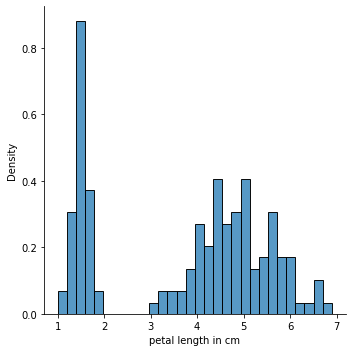

In [62]:
plt.figure(1)
sns.displot(iris["petal length in cm"], stat = "density", bins= 30)

### Gaussian 

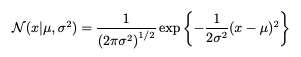

In [63]:
display.Image("Univariate_Gaussian.png")

<Figure size 432x288 with 0 Axes>

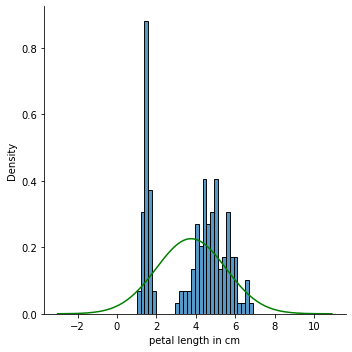

In [64]:
x = np.arange(-3,11,0.1)
y = stats.norm(iris["petal length in cm"].mean(),iris["petal length in cm"].std()).pdf(x)
plt.figure(2)
sns.displot(iris["petal length in cm"], stat = "density", bins= 30)
plt.plot(x, y, label = "Univariate Gaussian", c= "g")

### Gaussian Mixture Model (GMM)
A sum of weighted Gaussians

$ p(x) = \sum \limits _{k=1}^{K}\pi_{k}\cal{N}(x | \mu_{k},\sigma_{k}^2) $

$ 0 \le \pi_{k} \le 1 $

$ \sum \limits _{k=1}^{K} \pi_{k} = 1 $

K = # of gaussians to fit to data

#### Expectation Step
Calulate the likelihood of observations x with the learning parameters using pdf for normal distribution

$ \cal{N}(x | \mu_{k},\sigma_{k}^2) = \frac{1}{(2\pi\sigma^2)^{1/2}} exp \bigg\{\frac{-1}{2\sigma^2}(x-\mu)^2\bigg\} $

#### Maximization Step
$ \gamma_{k}$ is the likelihood that a given observation x belongs the the Kth gaussian

$ \gamma_{k} = \frac{\pi_{k}\cal{N}(x | \mu_{k},\sigma_{k}^2)}{\sum \limits _{k=1}^{K}\pi_{k}\cal{N}(x | \mu_{k},\sigma_{k}^2)} $

Re-evalute the learning parameters $\mu_{k},\sigma_{k}^2,\pi_{k}$

$ \mu_{k} = \frac{\sum \gamma_{k}x}{\sum \gamma_{k}} $

$ \sigma_{k}^2 = \frac{\sum\gamma_{k}(x-\mu_{k})^2}{\sum \gamma_{k}}$

$ \pi_{k} = \frac{1}{N}\sum\gamma_{k} $



### Expectation Maximization


In [65]:
# try to fit two gaussians
K=2
mean = np.array([1,7])
variance = np.array([0.1,0.5])
# start with it being equal likelihood that observation comes from either gaussian 
weight = np.array([0.5,0.5])

notConverged = True

while notConverged:
    priorMean = np.copy(mean)
    priorVar = np.copy(variance)
    priorWeight = np.copy(weight)

    # Expectation step
    likelihoodList = []
    for k in range(K):
        y = stats.norm(mean[k],np.sqrt(variance[k])).pdf(iris["petal length in cm"])
        likelihoodList.append(y)
    likelihood = np.array(likelihoodList)

    # Maximization step
    gamma = []
    sum = np.sum(likelihood[k]*weight[k] for k in range(K))
    for k in range(K):
        gamma.append((likelihood[k]*weight[k])/sum)
        # update step
        mean[k] = np.sum(gamma[k]*iris["petal length in cm"] / np.sum(gamma[k]))
        variance[k] = np.sum(gamma[k]* np.square(iris["petal length in cm"] - mean[k])) / np.sum(gamma[k])
        weight[k] = np.mean(gamma[k])
    
    if (priorMean == mean).all() and (priorVar == variance).all() and (priorWeight == weight).all():
        notConverged = False
    
    mvw = pd.DataFrame([mean,priorMean,variance,priorVar,weight,priorWeight])
    mvw = mvw.transpose()
    mvw.columns = ["mean","prior mean","variance","prior variance","weight","prior weight"]
    


<ipython-input-65-8ce46be014d6>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))


<Figure size 432x288 with 0 Axes>

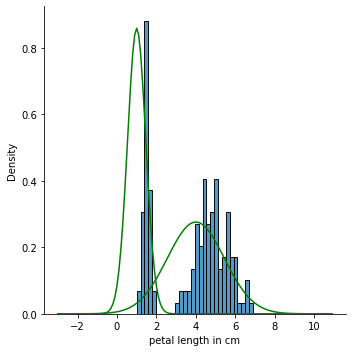

In [66]:
x = np.arange(-3,11,0.1)
y1 = stats.norm(mean[0],np.sqrt(variance[0])).pdf(x)
y2 = stats.norm(mean[1],np.sqrt(variance[1])).pdf(x)
plt.figure(2)
sns.displot(iris["petal length in cm"], stat = "density", bins= 30)
plt.plot(x, y1, c= "g")
plt.plot(x, y2, c= "g")

### Gaussian Multivariate

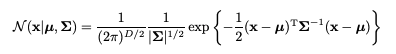

In [67]:
display.Image("Multivariate_Gaussian.png")

Σ = a DxD dimensional covariance matrix

µ = a D-Dimensional mean vector

|Σ| = determinant of Σ


                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            0.685694          -0.039268            1.273682   
sepal width in cm            -0.039268           0.188004           -0.321713   
petal length in cm            1.273682          -0.321713            3.113179   
petal width in cm             0.516904          -0.117981            1.296387   

                    petal width in cm  
sepal length in cm           0.516904  
sepal width in cm           -0.117981  
petal length in cm           1.296387  
petal width in cm            0.582414  
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length in cm, dtype: float64


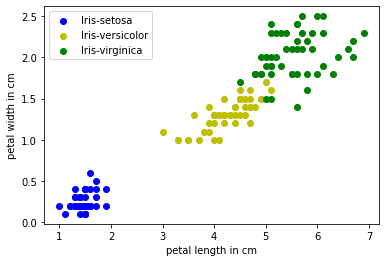

In [68]:
print(iris.cov())
print(iris["petal length in cm"].describe())

setosa = iris.loc[iris["class"] == "Iris-setosa"]
versicolor = iris.loc[iris["class"] == "Iris-versicolor"]
verginica = iris.loc[iris["class"] == "Iris-virginica"]
plt.figure(0)
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.scatter(x=setosa["petal length in cm"], y=setosa["petal width in cm"], c= 'b', label = "Iris-setosa")
plt.scatter(x=versicolor["petal length in cm"], y=versicolor["petal width in cm"], c= 'y', label = "Iris-versicolor" )
plt.scatter(x=verginica["petal length in cm"], y=verginica["petal width in cm"], c= 'g', label = "Iris-virginica")
plt.legend()


### K-Means

![K_Means](./K_Means.png)
J = sum of squares of the distances of each data point to its assigned vector $\mu_{k}$  
$\mu_{k}$ represents the centroids of K clusters  
$r_{nk} \in$ {0,1} where k = 1,...,K clusters  
$r_{nk}$ = 1 if data point $x_{n}$ is in cluster k and $r_{nk}$ = 0 otherwise  
Want to find values for $r_{nk}$ and $\mu_{k}$ to minimize J  
Iterative approach that seeks to:    
(1) Randomly assign values for $\mu_{k}$ (Centroids)  
**Expectation Step**   
(2) minimize J with respect to $r_{nk}$ while $\mu_{k}$ is fixed  
![rnk](./rnk.png)  
**Maximization Step**   
(3) minimize J with respect to $\mu_{k}$ while $r_{nk}$ is fixed  
Here we have the mean of the data points $x_{n}$ assigned to each cluster k
![uk](./uk.png) 
(4) repeat steps (2) and (3) until convergence is reached  

In [216]:
from numpy.linalg import norm
class KMeans:
    def __init__(self, numClusters):
        self.numClusters = numClusters
        
    
    # X is a two column dataframe for 2 feature case
    def initializeMean(self, X):
        # returns a df with n randomly selected rows
        rows = X.sample(n=self.numClusters)
        rows.reset_index(inplace =True, drop =True)
        centroids = rows
        
        return centroids
    
    def FindClosestCentroid(self,X,centroids):
        index = 0
        closestCentroid = []
        for row in range(len(X.index)):
            minDistance = float('inf')
            for k in range(self.numClusters):
                # if the norm is smaller than the previous norm then store
                Distance = np.square(X.iloc[row,0]-centroids.iloc[k,0])+np.square(X.iloc[row,1]-centroids.iloc[k,1])
                if minDistance > Distance:
                    minDistance = Distance
                    index = k
            closestCentroid.append(index)
            self.closestCentroid = closestCentroid
        return closestCentroid
    
    def UpdateMean(self,closestCentroid, X):
        X["K"]=closestCentroid
        centroids = []
        
        #closest = pd.DataFrame(closestCentroid, columns = ["K"])
        for k in range(self.numClusters):
            closest = X[X["K"] == k]
            
            # get average of x and y values
            x_avg = closest.iloc[:,0].sum()/len(closest.index)
            y_avg = closest.iloc[:,1].sum()/len(closest.index)
            centroids.append([x_avg,y_avg])
            self.centroids = centroids
        return pd.DataFrame(centroids)
        
    def Fit(self,X):
        notConverged = True
        centroids = self.initializeMean(X)
        count =0
        while notConverged:
            oldCentroids = centroids
            closestCentroid = self.FindClosestCentroid(X,centroids)
            centroids = self.UpdateMean(closestCentroid,X)
           
            if np.all(np.array(oldCentroids) == np.array(centroids)):
                notConverged = False
            self.Visualize(X,count)
            count=count+1
        print(centroids)
        
    def Visualize(self,X,numFig):
        centroids = self.centroids
        closestCentroid = self.closestCentroid
        centroids = pd.DataFrame(centroids)
        X["K"] = closestCentroid
        zero = X[X["K"]==0]
        one = X[X["K"]==1]
        two = X[X["K"]==2]
        plt.figure(numFig)
        plt.xlabel("petal length in cm")
        plt.ylabel("petal width in cm")
        plt.title("Iteration "+ str(numFig))
        plt.scatter(x=zero.iloc[:,0], y=zero.iloc[:,1], c= 'b', alpha = 0.3)
        plt.scatter(x=one.iloc[:,0], y=one.iloc[:,1], c= 'y', alpha = 0.6)
        plt.scatter(x=two.iloc[:,0], y=two.iloc[:,1], c= 'g', alpha = 0.4)
        plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], c= 'r', marker='x', s= 60)
        plt.legend()
        
    

#centroids = km.initializeMean(LengthWidth)
#print(centroids)
#print(centroids.iloc[0,:])
#print(LengthWidth)
#closestCentroid =km.FindClosestCentroid(LengthWidth,centroids)
#km.UpdateMean(closestCentroid,LengthWidth)




<ipython-input-216-082dcef0e6f8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["K"]=closestCentroid
<ipython-input-216-082dcef0e6f8>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["K"] = closestCentroid
No handles with labels found to put in legend.
<ipython-input-216-082dcef0e6f8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

<ipython-input-216-082dcef0e6f8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["K"]=closestCentroid
<ipython-input-216-082dcef0e6f8>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["K"] = closestCentroid
No handles with labels found to put in legend.
<ipython-input-216-082dcef0e6f8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

          0         1
0  1.464000  0.244000
1  4.269231  1.342308
2  5.595833  2.037500


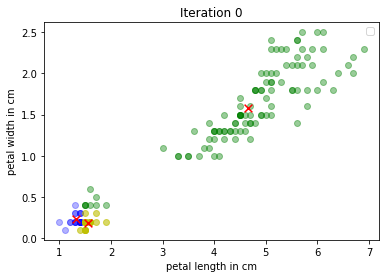

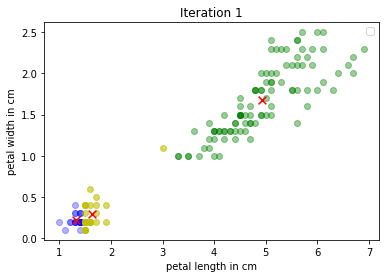

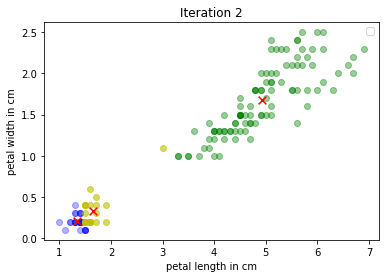

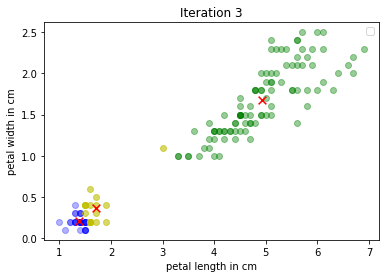

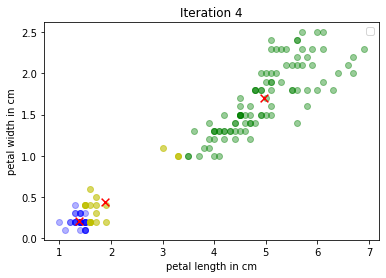

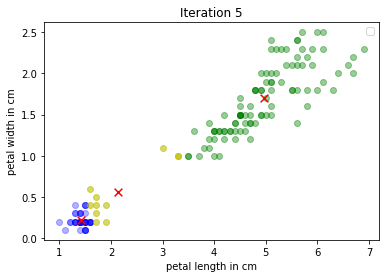

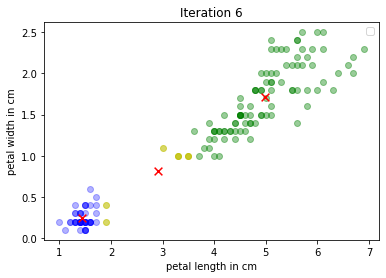

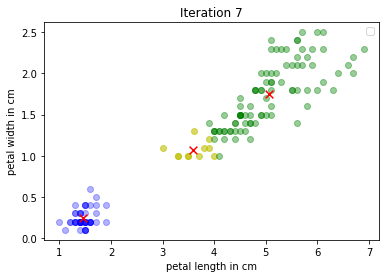

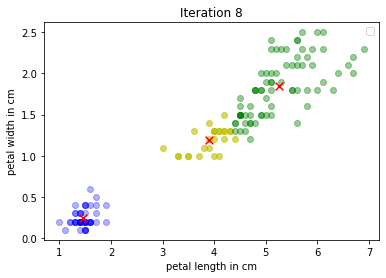

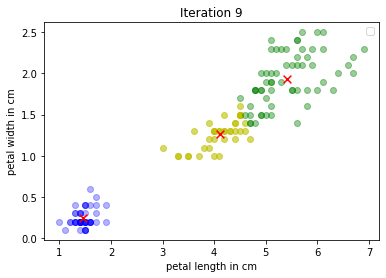

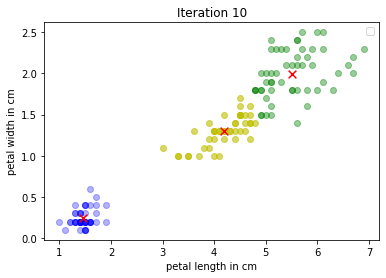

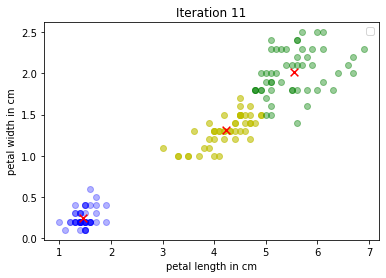

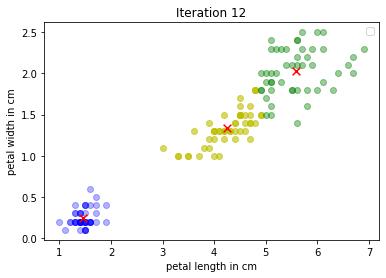

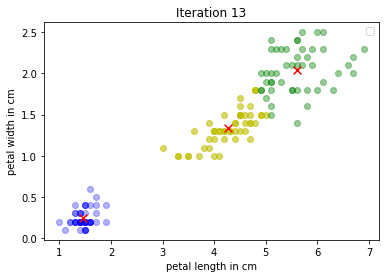

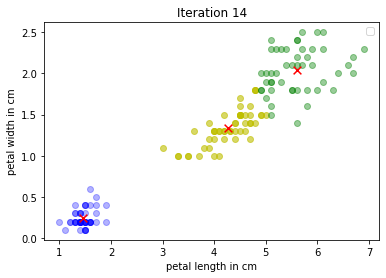

In [220]:
LengthWidth = iris[["petal length in cm","petal width in cm"]] 
km = KMeans(3)
km.Fit(LengthWidth)


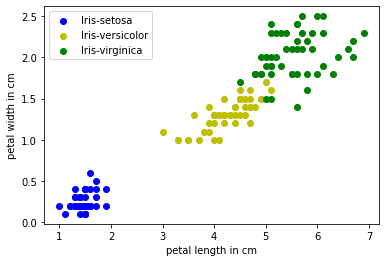

In [219]:
plt.figure(0)
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.scatter(x=setosa["petal length in cm"], y=setosa["petal width in cm"], c= 'b', label = "Iris-setosa")
plt.scatter(x=versicolor["petal length in cm"], y=versicolor["petal width in cm"], c= 'y', label = "Iris-versicolor" )
plt.scatter(x=verginica["petal length in cm"], y=verginica["petal width in cm"], c= 'g', label = "Iris-virginica")
plt.legend()